In [1]:
import torch
import torch.nn

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from model import ImageClassifier

from utils import load_mnist
from utils import split_data
from utils import get_hidden_size

In [11]:
model_fn = './model.pth'

In [4]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [5]:
def load(fn,device):
    d = torch.load(fn,map_location=device) 
    # map_location 사용하지 않으면 학습시 사용됬던 gpu로 올라가게됨 (ex. 학습시 8번 gpu 사용 -> 8번 gpu로 올라감)

    return d['model'],d['config']

In [6]:
def plot(x,y_hat):
    for i in range(x.shape[0]):
        img = (np.array(x[i].detach().cpu(),dtype='float')).reshape(28,28)

        plt.imshow(img,cmap='gray')
        plt.show()
        print('Predict:',float(torch.argmax(y_hat[i],dim=-1)))

In [7]:
def test(model,x,y,to_be_shown=True):
    model.eval()

    with torch.no_grad():
        y_hat=model(x)

        correct_cnt = (y.squeeze() == torch.argmax(y_hat,dim=-1)).sum()
        total_cnt = int(x.shape[0])

        accuracy = correct_cnt/total_cnt
        print('Accuracy :%.4f'% (accuracy))

        if to_be_shown:
            plot(x,y_hat)

In [14]:
x,y = load_mnist(is_train=False)
x=x.reshape(x.shape[0],-1)

x,y = x.to(device),y.to(device)

input_size = int(x.shape[-1])
output_size = int(max(y))+1

model_dict,train_config = load(model_fn,device)

model = ImageClassifier(
                        input_size=input_size,
                        output_size=output_size,
                        hidden_sizes=get_hidden_size(input_size,output_size,train_config.n_layers),
                        use_batch_norm = not train_config.use_dropout,
                        dropout_p = train_config.dropout_p
                        ).to(device)

model.load_state_dict(model_dict)

test(model,x,y,to_be_shown=False)

Accuracy :0.9785


Accuracy :1.0000


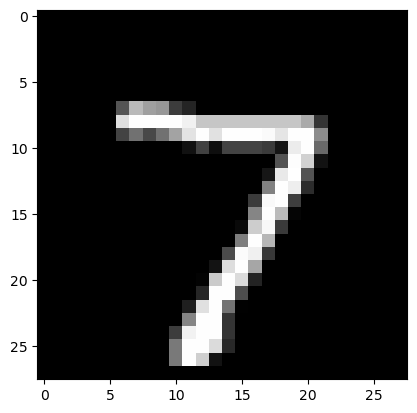

Predict: 7.0


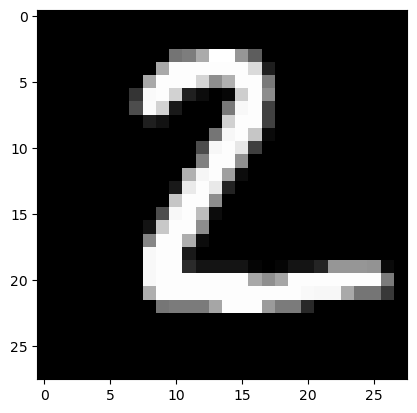

Predict: 2.0


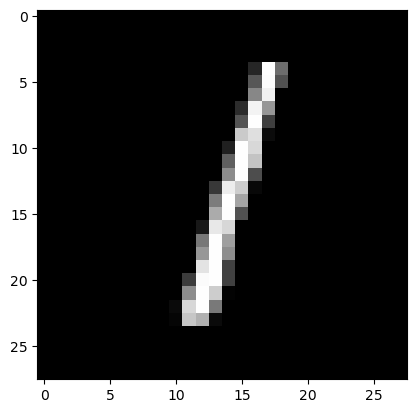

Predict: 1.0


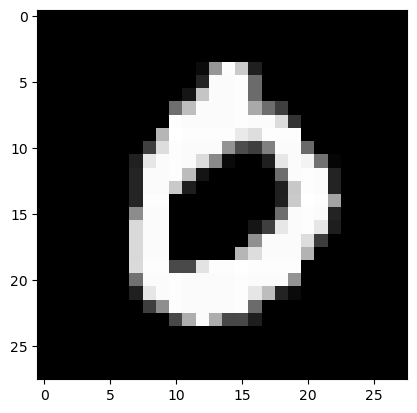

Predict: 0.0


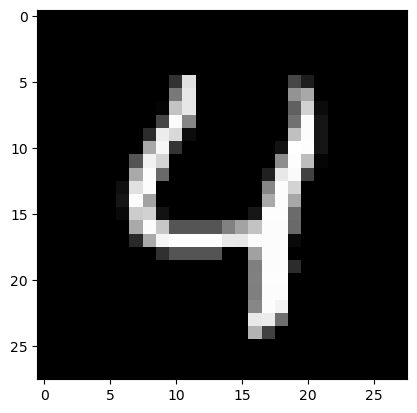

Predict: 4.0


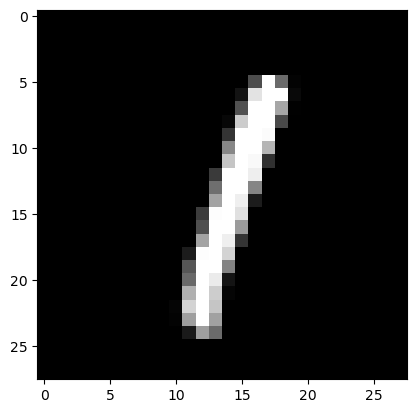

Predict: 1.0


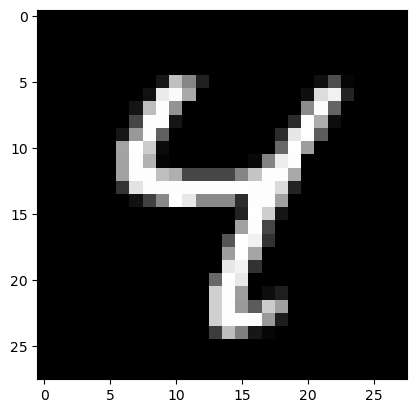

Predict: 4.0


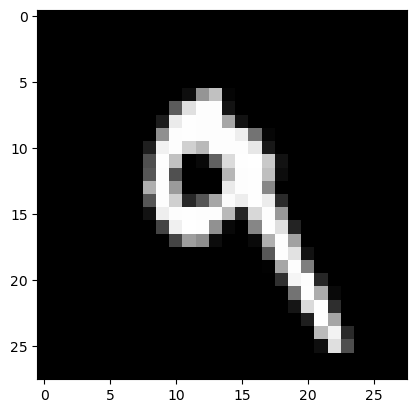

Predict: 9.0


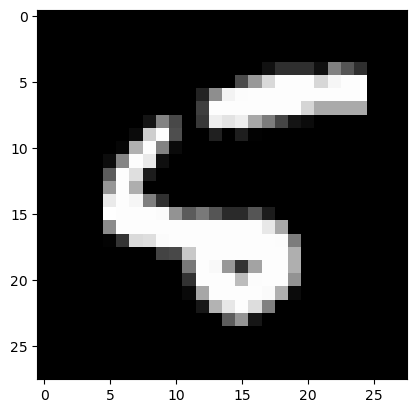

Predict: 5.0


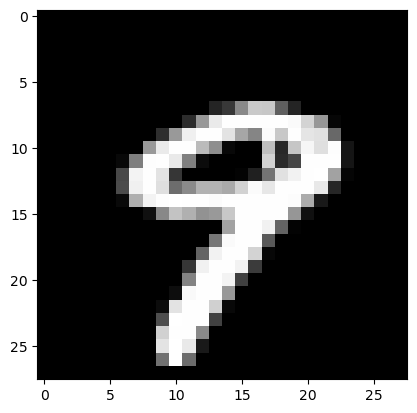

Predict: 9.0


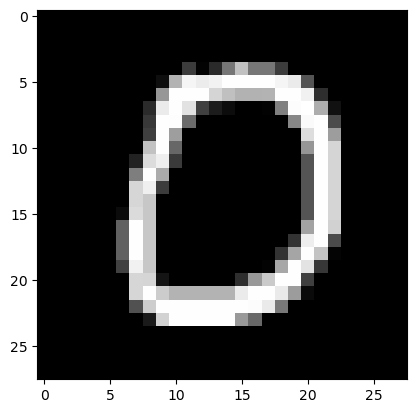

Predict: 0.0


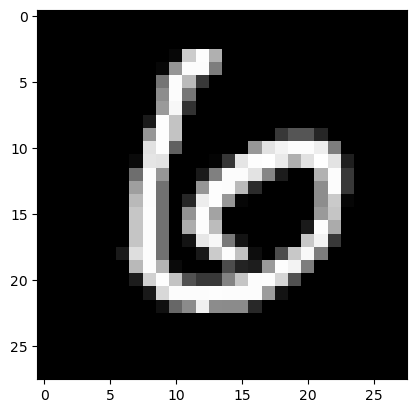

Predict: 6.0


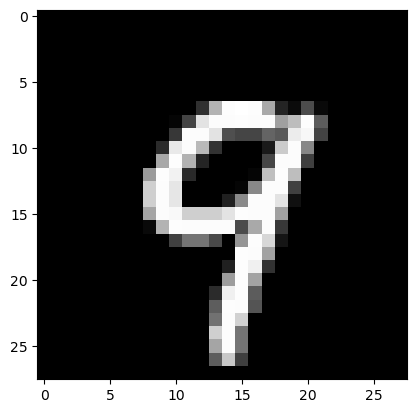

Predict: 9.0


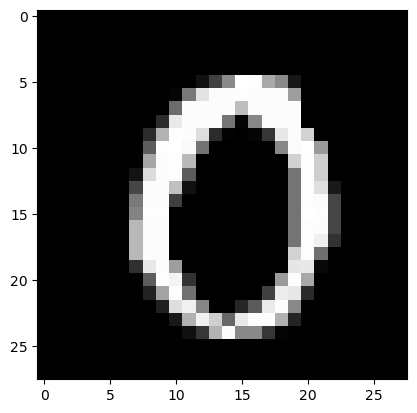

Predict: 0.0


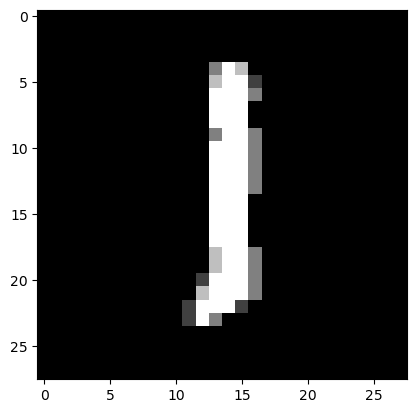

Predict: 1.0


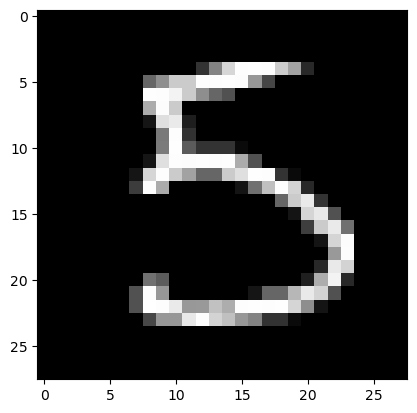

Predict: 5.0


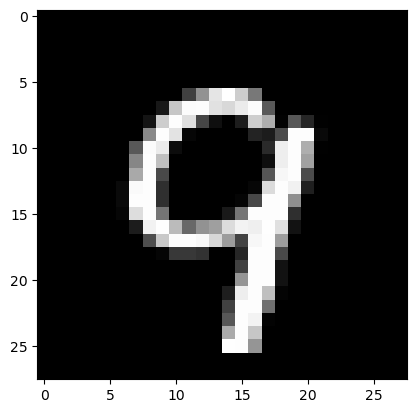

Predict: 9.0


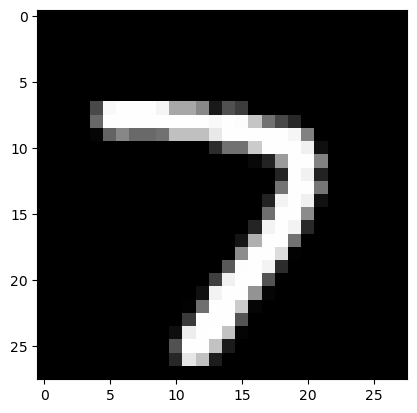

Predict: 7.0


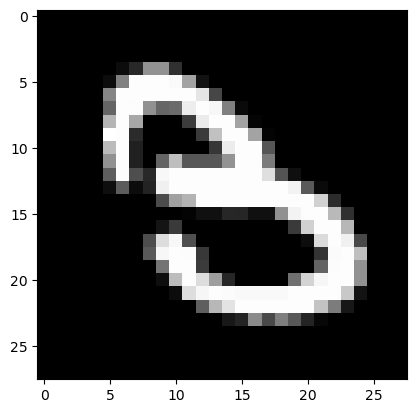

Predict: 3.0


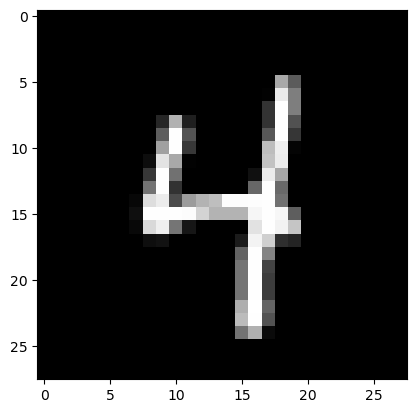

Predict: 4.0


In [15]:
n_test=20
test(model,x[:n_test],y[:n_test],to_be_shown=True)